In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sns
x = np.linspace(-4, 4, 100)
tencent_blue = (0,0.3215686274509804,0.8509803921568627)
tencent_orange = (0.9333333333333333, 0.49411764705882355, 0.2784313725490196)


# Calculate y-values for the standard normal density curve
y_standard_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [18]:
# 1. run within the directory of data files 
# import os 
# dir_files = os.listdir()
# df_list = []
# for f in dir_files:
#     if '.csv' in f:
#         result_pd = pd.read_csv(f)
#     df_list += [result_pd ]
#result_pd = pd.concat(df_list)

# 2. Alternatively, read in data from a csv file 
result_pd = pd.read_csv("PaperResult/results_1106Q3000_002.csv")

In [6]:
truth =  result_pd['truth']

In [7]:
# result_pd = pd.read_csv("result2405new/synthetic_aa_j50q1000k5_100.csv")
debias_B_true = np.array(result_pd['debias_point'])
debias_var_B_true = np.array(result_pd['debias_var'])
dim_B =  np.array(result_pd['dim'])
dim_var_B =  np.array(result_pd['dim_var'])
undebias_B_true =  np.array(result_pd['undebias_point'])
undebias_var_B_true = np.array(result_pd['undebias_var'])
Q = result_pd['Q'].values[0]
n_folds = 3

In [8]:
# sns.kdeplot(np.array(debias_B_true) /  np.sqrt(np.array(debias_var_B_true)/(int(Q/n_folds))) , shade = True,color=tencent_blue,label = "Ours(debiased)",alpha=0.1)
# sns.kdeplot(np.array(undebias_B_true) /  np.sqrt(np.array(debias_var_B_true)/(int(Q/n_folds))) , shade = True,color='red',label = "Ours(undebiased)",alpha=0.1)
# sns.kdeplot(np.array(dim_B) / np.sqrt(np.array(dim_var_B)), shade = True,color=tencent_orange,label = "DIM",alpha=0.1)
# plt.plot(x, y_standard_normal, color='black', label="Standard Normal", ls='--')
# plt.legend()
# # plt.savefig("result2404new/comparison_estimators.png")

/opt/.jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/.jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/.jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.
/opt/.jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  import sys
/opt/.jupyter/lib/python3.7/site-packages/IPython/core/pyl

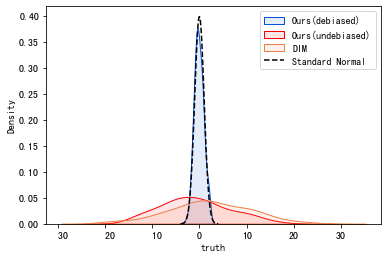

In [16]:
plt.figure() 
sns.kdeplot((np.array(debias_B_true) - truth) /  np.sqrt(np.array(debias_var_B_true)/(int(Q))) , shade = True,color=tencent_blue,label = "Ours(debiased)",alpha=0.1)
sns.kdeplot((np.array(undebias_B_true)- truth) /  np.sqrt(np.array(undebias_var_B_true)/(int(Q))) , shade = True,color='red',label = "Ours(undebiased)",alpha=0.1)
sns.kdeplot((np.array(dim_B) - truth) / np.sqrt(np.array(dim_var_B) / int(Q)), shade = True,color=tencent_orange,label = "DIM",alpha=0.1)
plt.plot(x, y_standard_normal, color='black', label="Standard Normal", ls='--')
plt.legend()
plt.savefig("AB_plot_11063000.png")


In [10]:
np.mean(np.abs(result_pd['debias_point']-result_pd['truth']) )

0.02873132657521507

In [11]:
np.mean(np.abs(result_pd['dim']-result_pd['truth']))

1.3999262483834005

In [12]:
np.mean(np.abs(result_pd['undebias_point']-result_pd['truth']))

0.01683946245504318

In [13]:
np.mean(result_pd['debias_point']-result_pd['truth'])

-0.0044070568619519355

In [14]:
np.mean(result_pd['dim']-result_pd['truth'])

0.4059923144700011

In [15]:
np.mean(result_pd['undebias_point']-result_pd['truth'])

-0.002999426437932604